In [8]:
import os

In [5]:
import requests

# URL of the categories file
url = 'https://raw.githubusercontent.com/googlecreativelab/quickdraw-dataset/master/categories.txt'

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open('categories.txt', 'w') as file:
        file.write(response.text)
    print("categories.txt downloaded successfully!")
else:
    print("Failed to download categories.txt.")


categories.txt downloaded successfully!


In [6]:
f = open("categories.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [7]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]

In [9]:
os.mkdir("data")

In [22]:
import urllib.request
def download():
    base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
    for c in classes:        
        cls_url = c.replace('_', '%20')
        path = base+cls_url+'.npy'
        local_file = f'data/{c}.npy'
        print(local_file)
        # Check if the file already exists
        if os.path.exists(local_file):
            print(f"Skipping {c}, already downloaded.")
            continue
        print(path)
        urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [25]:
download()

data/aircraft_carrier.npy
Skipping aircraft_carrier, already downloaded.
data/airplane.npy
Skipping airplane, already downloaded.
data/alarm_clock.npy
Skipping alarm_clock, already downloaded.
data/ambulance.npy
Skipping ambulance, already downloaded.
data/angel.npy
Skipping angel, already downloaded.
data/animal_migration.npy
Skipping animal_migration, already downloaded.
data/ant.npy
Skipping ant, already downloaded.
data/anvil.npy
Skipping anvil, already downloaded.
data/apple.npy
Skipping apple, already downloaded.
data/arm.npy
Skipping arm, already downloaded.
data/asparagus.npy
Skipping asparagus, already downloaded.
data/axe.npy
Skipping axe, already downloaded.
data/backpack.npy
Skipping backpack, already downloaded.
data/banana.npy
Skipping banana, already downloaded.
data/bandage.npy
Skipping bandage, already downloaded.
data/barn.npy
Skipping barn, already downloaded.
data/baseball.npy
Skipping baseball, already downloaded.
data/baseball_bat.npy
Skipping baseball_bat, alread

In [4]:
import os
import glob
import numpy as np
from tensorflow.python.keras import layers
from tensorflow import keras 
import tensorflow as tf

print(len(os.listdir('data')))

345


In [5]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 2000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [6]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

In [7]:
x_bup_train, y_bup_train, x_bup_test, y_bup_test=x_train, y_train, x_test, y_test

In [18]:
x_train, y_train, x_test, y_test=x_bup_train, y_bup_train, x_bup_test, y_bup_test

In [8]:
print(len(x_train))

552000


dog


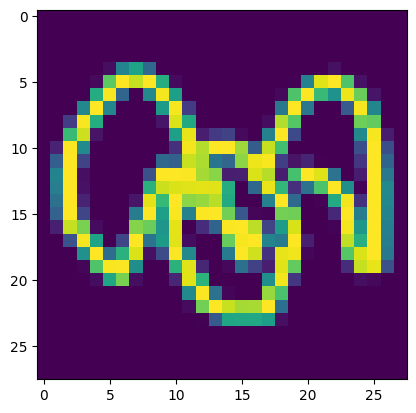

In [9]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28))
print(class_names[int(y_train[idx].item())])

In [11]:
x_train.shape[0]

552000

In [12]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
x_train.shape

(28, 28, 1)

In [20]:
# Assuming x_train and x_test are numpy arrays
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [21]:
# Define model 
# CNN_simple
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(345, activation='softmax'))

# Train model
adam = tf.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
# print(model.summary())

In [22]:
model.fit(x_train, y_train, batch_size=64, epochs=23, validation_data=(x_test, y_test))

Epoch 1/23
8625/8625 [==============================] - 123s 14ms/step - loss: 2.7104 - top_k_categorical_accuracy: 0.6655 - val_loss: 2.1942 - val_top_k_categorical_accuracy: 0.7634
Epoch 2/23
8625/8625 [==============================] - 121s 14ms/step - loss: 2.0705 - top_k_categorical_accuracy: 0.7823 - val_loss: 2.0163 - val_top_k_categorical_accuracy: 0.7903
Epoch 3/23
8625/8625 [==============================] - 132s 15ms/step - loss: 1.9229 - top_k_categorical_accuracy: 0.8050 - val_loss: 1.9237 - val_top_k_categorical_accuracy: 0.8050
Epoch 4/23
8625/8625 [==============================] - 181s 21ms/step - loss: 1.8439 - top_k_categorical_accuracy: 0.8162 - val_loss: 1.8854 - val_top_k_categorical_accuracy: 0.8114
Epoch 5/23
8625/8625 [==============================] - 115s 13ms/step - loss: 1.7941 - top_k_categorical_accuracy: 0.8236 - val_loss: 1.8268 - val_top_k_categorical_accuracy: 0.8184
Epoch 6/23
8625/8625 [==============================] - 167s 19ms/step - loss: 1.7586

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 83.13%


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

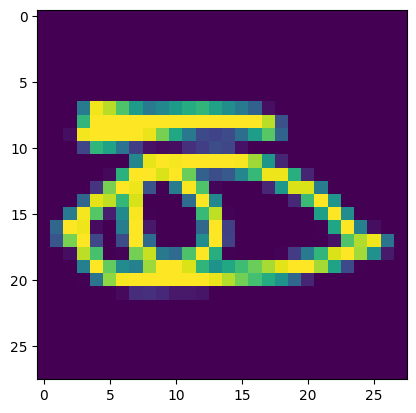

In [22]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
print(y_test[idx])

In [18]:
(np.expand_dims(img, axis=0)).shape

(1, 28, 28, 1)

In [20]:
pred = model.predict(np.expand_dims(img, axis=0))[0]

ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

1/1 [==============================] - 1s 920ms/step
['bracelet', 'necklace', 'goatee', 'bottlecap', 'campfire']


In [23]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [27]:
model.save('keras.h5')

In [ ]:
from keras.models import load_model
model = load_model('fml.h5')

In [10]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 3, 3, 64)         

In [ ]:
def predict_fn(image):

  # preprocessing the size:
  resized_image = tf.image.resize(image, (28, 28))
  image= np.array(resized_image)
  image = image.reshape(image.shape[0], image_size, image_size, 1).astype('float32')
  
  image /=255.0

  pred = model.predict(np.expand_dims(image, axis=0))[0]
  ind = (-pred).argsort()[:5]
  latex = [classes[x] for x in ind]
  return latex

In [ ]:
model.save('model_directory', save_format='tf')